In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
posts = pd.read_csv('export/posts.csv')
authors = pd.read_csv('export/authors.csv')

In [3]:
posts['posted_at_timestamp'] = posts['posted_at'].apply(lambda x: pd.Timestamp(x))
posts['posted_at_timestamp'] = posts.posted_at_timestamp.astype('int64') // 10**9
posts['date'] = pd.to_datetime(posts.posted_at_timestamp, unit='s')

In [4]:
posts.head()

,id,title,body,url,reddit_id,comments_count,posted_at,author_id,created_at,updated_at,score,upvoted,short_url,subreddit_id,posted_at_timestamp,date
0,1,[UPDATE] I (29F) keep finding long hairs in my...,Original post\n\n​\n\nI ultimately decided ...,/r/relationship_advice/comments/hu3e0a/update_...,t3_hu3e0a,3476,2020-07-19 16:36:08 UTC,1.0,2021-03-22 14:23:10 UTC,2021-04-18 21:28:54 UTC,131695,95,https://redd.it/hu3e0a,1,1595176568,2020-07-19 16:36:08
1,2,Update: My (32F) husband (36M) became a robot ...,\n\nHey everybody heres the update I wrote thi...,/r/relationship_advice/comments/hmzvgt/update_...,t3_hmzvgt,3952,2020-07-07 18:15:40 UTC,2.0,2021-03-22 14:23:22 UTC,2021-04-18 19:15:01 UTC,116584,94,https://redd.it/hmzvgt,1,1594145740,2020-07-07 18:15:40
2,3,UPDATE: My girlfriend told me she was with a f...,Original \n\nHey guys Oh my god where to begi...,/r/relationship_advice/comments/hjkgnj/update_...,t3_hjkgnj,5678,2020-07-01 22:17:55 UTC,3.0,2021-03-22 14:23:35 UTC,2021-04-18 16:12:08 UTC,116038,94,https://redd.it/hjkgnj,1,1593641875,2020-07-01 22:17:55
3,4,"UPDATE: my son and his ""friend"" are a couple. ...",I tried yo post this before but it got removed...,/r/relationship_advice/comments/fwog3j/update_...,t3_fwog3j,2510,2020-04-07 17:18:31 UTC,4.0,2021-03-22 14:23:48 UTC,2021-04-18 00:25:25 UTC,91942,90,https://redd.it/fwog3j,1,1586279911,2020-04-07 17:18:31
4,5,yesterday I froze during sex and my girlfriend...,I am 23M and Ive been raped before Twice Ive b...,/r/relationship_advice/comments/j1ur51/yesterd...,t3_j1ur51,2448,2020-09-29 07:42:36 UTC,5.0,2021-03-22 14:24:32 UTC,2021-04-18 17:35:16 UTC,74681,87,https://redd.it/j1ur51,1,1601365356,2020-09-29 07:42:36


In [5]:
posts.astype

<bound method NDFrame.astype of             id                                              title  \
0            1  [UPDATE] I (29F) keep finding long hairs in my...   
1            2  Update: My (32F) husband (36M) became a robot ...   
2            3  UPDATE: My girlfriend told me she was with a f...   
3            4  UPDATE: my son and his "friend" are a couple. ...   
4            5  yesterday I froze during sex and my girlfriend...   
...        ...                                                ...   
146794  161853  Adult child discovered dad cheating on mom for...   
146795  161854  Etiquette for Christmas presents with ex-partn...   
146796  161855  So, I (33M) moved to a new city, got dumped, t...   
146797  161856                        Finally considering divorce   
146798  161857  I (22M) am really struggling with my partner’s...   

                                                     body  \
0          Original post\n\n​\n\nI ultimately decided ...   
1       \n\nHey e

In [6]:
posts.describe()

,id,comments_count,author_id,score,upvoted,subreddit_id,posted_at_timestamp
count,146799.000000,146799.000000,136438.000000,146799.000000,146799.000000,146799.000000,1.467990e+05
mean,85433.643908,46.961083,72009.170576,150.010879,76.274178,1.604684,1.462253e+09
std,44543.111356,146.987708,38172.985988,1385.282202,18.306164,0.549186,9.110692e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.246429e+09
25%,47552.500000,10.000000,39436.250000,1.000000,67.000000,1.000000,1.391736e+09
50%,85861.000000,21.000000,72350.500000,6.000000,80.000000,2.000000,1.453834e+09
75%,123892.500000,43.000000,104698.750000,40.000000,91.000000,2.000000,1.538796e+09
max,161857.000000,15528.000000,138350.000000,131695.000000,100.000000,9.000000,1.618330e+09


In [7]:
posts['space_count'] = posts.body.str.count("\n")

In [8]:
posts['len_text'] = posts.body.str.len()

In [9]:
posts.head()

,id,title,body,url,reddit_id,comments_count,posted_at,author_id,created_at,updated_at,score,upvoted,short_url,subreddit_id,posted_at_timestamp,date,space_count,len_text
0,1,[UPDATE] I (29F) keep finding long hairs in my...,Original post\n\n​\n\nI ultimately decided ...,/r/relationship_advice/comments/hu3e0a/update_...,t3_hu3e0a,3476,2020-07-19 16:36:08 UTC,1.0,2021-03-22 14:23:10 UTC,2021-04-18 21:28:54 UTC,131695,95,https://redd.it/hu3e0a,1,1595176568,2020-07-19 16:36:08,25,2864
1,2,Update: My (32F) husband (36M) became a robot ...,\n\nHey everybody heres the update I wrote thi...,/r/relationship_advice/comments/hmzvgt/update_...,t3_hmzvgt,3952,2020-07-07 18:15:40 UTC,2.0,2021-03-22 14:23:22 UTC,2021-04-18 19:15:01 UTC,116584,94,https://redd.it/hmzvgt,1,1594145740,2020-07-07 18:15:40,59,5109
2,3,UPDATE: My girlfriend told me she was with a f...,Original \n\nHey guys Oh my god where to begi...,/r/relationship_advice/comments/hjkgnj/update_...,t3_hjkgnj,5678,2020-07-01 22:17:55 UTC,3.0,2021-03-22 14:23:35 UTC,2021-04-18 16:12:08 UTC,116038,94,https://redd.it/hjkgnj,1,1593641875,2020-07-01 22:17:55,28,3593
3,4,"UPDATE: my son and his ""friend"" are a couple. ...",I tried yo post this before but it got removed...,/r/relationship_advice/comments/fwog3j/update_...,t3_fwog3j,2510,2020-04-07 17:18:31 UTC,4.0,2021-03-22 14:23:48 UTC,2021-04-18 00:25:25 UTC,91942,90,https://redd.it/fwog3j,1,1586279911,2020-04-07 17:18:31,11,2786
4,5,yesterday I froze during sex and my girlfriend...,I am 23M and Ive been raped before Twice Ive b...,/r/relationship_advice/comments/j1ur51/yesterd...,t3_j1ur51,2448,2020-09-29 07:42:36 UTC,5.0,2021-03-22 14:24:32 UTC,2021-04-18 17:35:16 UTC,74681,87,https://redd.it/j1ur51,1,1601365356,2020-09-29 07:42:36,21,2551


<AxesSubplot:xlabel='date', ylabel='Density'>

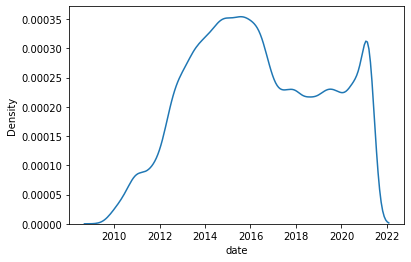

In [10]:
sns.kdeplot(data=posts, x='date')

In [11]:
import nltk

In [12]:
import requests

from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from joblib import Parallel, delayed
import spacy
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'ner', 'lemmatizer'])

def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=7, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(texts), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)

def lemmatize_pipe(doc):
    text = doc.text.lower()
    return normalize_text(text)

def read_stopwords(path):
    url = str(path)
    r = requests.get(url)
    return set(r.text.split('\n'))

def normalize_tokens(tokens):
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(' '.join(tokens))]

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def remove_stopwords(tokens, stopwords=None, min_length=4):
    if not stopwords:
        return tokens
    stopwords = set(stopwords)
    tokens = [tok
              for tok in tokens
              if tok not in stopwords and len(tok) >= min_length]
    return tokens

def normalize_text(text):
    words = [w for sent in sent_tokenize(text.lower())
             for w in regexp_tokenize(sent, r'(?u)\b\w{4,}\b')]
    words = normalize_tokens(words)
    words = remove_stopwords(words, stopwords)
    return ' '.join(words)

lemmatizer = WordNetLemmatizer()

stopwords = set(stopwords.words('english')) | read_stopwords('https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/stopwords-en.txt')

[nltk_data] Downloading package punkt to /home/edem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/edem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/edem/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
# posts['normalized'] = posts['body'].apply(lambda text: normalize_text(text))
posts['normalized'] = preprocess_parallel(posts['body'], chunksize=1000)

In [14]:
posts.to_csv('export/posts_normalized.csv', encoding='utf-8', index=False)

In [15]:
import datetime

def datestring_to_timestamp(datestring):
    return datetime.datetime.strptime(datestring, '%d.%m.%Y').timestamp()

def posts_by_year(df, year):
    return df[(df['posted_at_timestamp'] >= datestring_to_timestamp(f'01.01.{year}')) & (df['posted_at_timestamp'] < datestring_to_timestamp(f'31.12.{year}'))]

In [16]:
posts2018 = posts_by_year(posts, 2018)
posts2019 = posts_by_year(posts, 2019)
posts2020 = posts_by_year(posts, 2020)

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text, title, picture_fn='out.png', **wc_kwargs):
    wc = WordCloud(**wc_kwargs).generate(text)
    print(title)
    plt.figure(figsize=(12,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(picture_fn)

All


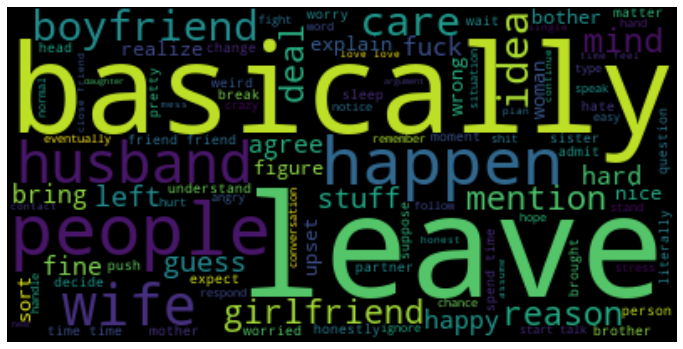

In [18]:
plot_word_cloud(" ".join(posts['normalized']), 'All', 'export/cloud.png', max_words=100, background_color='black')

2018


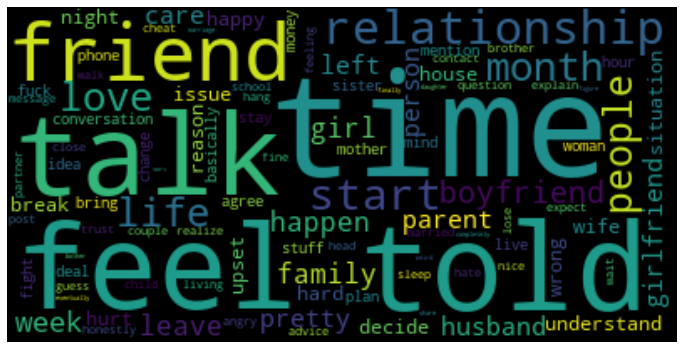

In [19]:
plot_word_cloud(" ".join(posts2018['normalized']), '2018', 'export/cloud2018.png', max_words=100, background_color='black')

2019


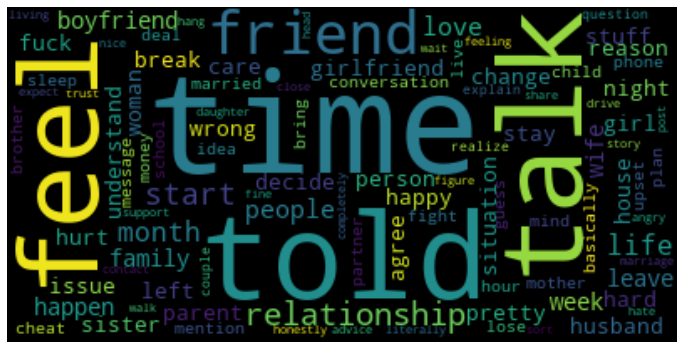

In [20]:
plot_word_cloud(" ".join(posts2019['normalized']), '2019', 'export/cloud2019.png', max_words=100, background_color='black')

2020


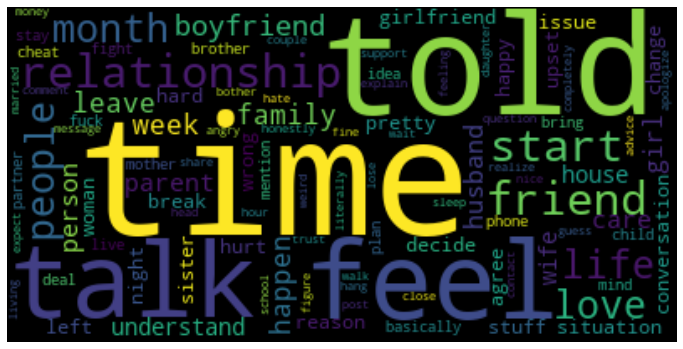

In [21]:
plot_word_cloud(" ".join(posts2020['normalized']), '2020', 'export/cloud2020.png', max_words=100, background_color='black')

In [22]:
posts_data = posts.drop(['id', 'title', 'body', 'normalized', 'url', 'posted_at', 'created_at', 'updated_at', 'short_url', 'reddit_id', 'subreddit_id'], axis=1)
posts_data = posts_data.fillna(0)
posts_data['author_id'] = posts_data['author_id'].apply(lambda id: int(id))
posts_data.fillna({'author_id': 0.0})
posts_data = posts_data.rename(columns={'author_id': 'id'})

authors_data = authors.drop(['name', 'created_at', 'updated_at', 'registered_at', 'reddit_id'], axis=1)

In [23]:
merged_data = pd.merge(posts_data, authors_data, on='id')

In [24]:
merged_data

,comments_count,id,score,upvoted,posted_at_timestamp,date,space_count,len_text,post_karma,comment_karma
0,3476,1,131695,95,1595176568,2020-07-19 16:36:08,25,2864,12,239
1,3952,2,116584,94,1594145740,2020-07-07 18:15:40,59,5109,14,3
2,1822,2,27574,98,1593924112,2020-07-05 04:41:52,33,2294,14,3
3,5678,3,116038,94,1593641875,2020-07-01 22:17:55,28,3593,17,5
4,10093,3,48414,94,1593465966,2020-06-29 21:26:06,21,3014,17,5
...,...,...,...,...,...,...,...,...,...,...
136433,10,138346,50,90,1590436865,2020-05-25 20:01:05,27,4356,35,1
136434,19,138347,0,30,1514570310,2017-12-29 17:58:30,11,2256,1,-6
136435,12,138348,2,100,1590380774,2020-05-25 04:26:14,15,2368,3,6
136436,11,138349,1,100,1590391327,2020-05-25 07:22:07,11,2496,48,36


In [25]:
merged_data_x = merged_data.drop(['id', 'score', 'date'], axis=1)
merged_data_y = merged_data.score

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(merged_data_x, merged_data_y, test_size = 0.30, random_state = 42)
clf_rf = RandomForestRegressor()
parametrs = {'n_estimators':  [ 40], 'max_depth': [12]}
grid_clf_rf = GridSearchCV(clf_rf, param_grid=parametrs, cv=5)

In [27]:
grid_clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [12], 'n_estimators': [40]})

In [28]:
grid_clf_rf.best_params_

{'max_depth': 12, 'n_estimators': 40}

In [29]:
best_grid_clf_rf = grid_clf_rf.best_estimator_

In [30]:
best_grid_clf_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=40)

In [31]:
feature_importances = best_grid_clf_rf.feature_importances_

In [32]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                      'feature_importances': feature_importances})

<AxesSubplot:>

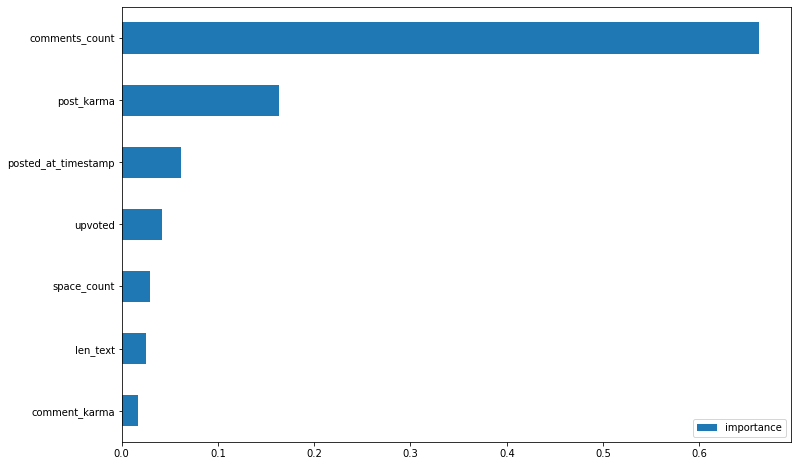

In [33]:
imp = pd.DataFrame(best_grid_clf_rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [34]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from ast import literal_eval
import pyLDAvis.gensim_models

docs = [[token for token in text.split()] for text in posts['normalized']]
dictionary = Dictionary(docs)

# Drop too common and too rare words
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Set training parameters.
num_topics = 15
chunksize = 2000
passes = 20
iterations = 400

temp = dictionary[0] 
id2word = dictionary.id2token 

model = LdaModel(
    corpus=corpus,
    id2word=id2word, 
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=None
)

In [35]:
pyLDAvis.enable_notebook()
ldavis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
ldavis

/home/edem/.pyenv/versions/3.8.5/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.131944  0.060217       1        1  25.688055
9     -0.196829  0.058612       2        1  20.108273
7     -0.252502  0.010523       3        1  10.215277
1     -0.193894  0.042280       4        1   6.645428
0     -0.075262 -0.220886       5        1   6.361672
4     -0.146475 -0.053769       6        1   4.347179
12     0.076255  0.157315       7        1   4.016604
8      0.178831 -0.002553       8        1   3.924978
11     0.010075 -0.154932       9        1   3.567598
6      0.130318 -0.178034      10        1   3.190464
2     -0.062469  0.195825      11        1   3.088510
10     0.091090 -0.192013      12        1   3.021500
5      0.226573  0.078404      13        1   2.465739
3      0.185446 -0.039738      14        1   2.408466
13     0.160788  0.238748      15        1   0.950256, topic_info=        Term           Freq          Total Category  logprob  loglift
128   family  128246.000000  128246.000000  Default  30.0000  30.0000
320   school   79910.000000   79910.000000  Default  29.0000  29.0000
231     girl  116144.000000  116144.000000  Default  28.0000  28.0000
312   parent   89561.000000   89561.000000  Default  27.0000  27.0000
431    night  117147.000000  117147.000000  Default  26.0000  26.0000
...      ...            ...            ...      ...      ...      ...
2182    race    1476.835179    2211.580698  Topic15  -4.8337   4.2524
55    people    4283.481546  132470.451041  Topic15  -3.7688   1.2246
461    speak    2131.543819   22959.330839  Topic15  -4.4667   2.2793
167    raise    1610.092858   13697.763364  Topic15  -4.7473   2.5153
868    marry    1526.708522   12296.023466  Topic15  -4.8005   2.5700

[921 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1826     12  0.999358     aaron
93       13  0.999766  abortion
1603      2  0.300307     abuse
1603      6  0.000789     abuse
1603      7  0.430182     abuse
...     ...       ...       ...
783       5  0.000148     wrong
783       6  0.000016     wrong
1237      2  0.035550      yell
1237      6  0.919169      yell
1237      8  0.045285      yell

[1984 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 10, 8, 2, 1, 5, 13, 9, 12, 7, 3, 11, 6, 4, 14])

In [36]:
coherence_model_lda = CoherenceModel(model=model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/home/edem/.pyenv/versions/3.8.5/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5080253017672881


In [37]:
pyLDAvis.save_html(ldavis, 'export/topic_modeling.html')

/home/edem/.pyenv/versions/3.8.5/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
